In [2]:
%load_ext autoreload
%autoreload 2

%cd ..
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

/cis/home/dpacker/my_documents/hoffman-coffee


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from src import exploratory
import numpy as np
from sklearn import decomposition, manifold

p_data_folder = Path("data")
p_plots = Path("plots")
p_data_file = p_data_folder / "hoffman_coffee.csv"

In [4]:
data = pd.read_csv(p_data_file)

In [17]:
for col in data.columns:
  print(col)

Submission ID
What is your age?
How many cups of coffee do you typically drink per day?
Where do you typically drink coffee?
Where do you typically drink coffee? (At home)
Where do you typically drink coffee? (At the office)
Where do you typically drink coffee? (On the go)
Where do you typically drink coffee? (At a cafe)
Where do you typically drink coffee? (None of these)
How do you brew coffee at home?
How do you brew coffee at home? (Pour over)
How do you brew coffee at home? (French press)
How do you brew coffee at home? (Espresso)
How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))
How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))
How do you brew coffee at home? (Instant coffee)
How do you brew coffee at home? (Bean-to-cup machine)
How do you brew coffee at home? (Cold brew)
How do you brew coffee at home? (Coffee extract (e.g. Cometeer))
How do you brew coffee at home? (Other)
How else do you brew coffee at home?
On the go, where

In [70]:
personal_preference_columns = [
  "Coffee A - Personal Preference",
  "Coffee B - Personal Preference",
  "Coffee C - Personal Preference",
  "Coffee D - Personal Preference"
]
acidity_columns = [
  "Coffee A - Acidity",
  "Coffee B - Acidity",
  "Coffee C - Acidity",
  "Coffee D - Acidity"
]
bitterness_columns = [
  "Coffee A - Bitterness",
  "Coffee B - Bitterness",
  "Coffee C - Bitterness",
  "Coffee D - Bitterness"
]

expertise_column = ["Lastly, how would you rate your own coffee expertise?"]

subsets = data[[
  *personal_preference_columns,
  *acidity_columns,
  *bitterness_columns,
  *expertise_column
  ]].dropna()


<Axes: >

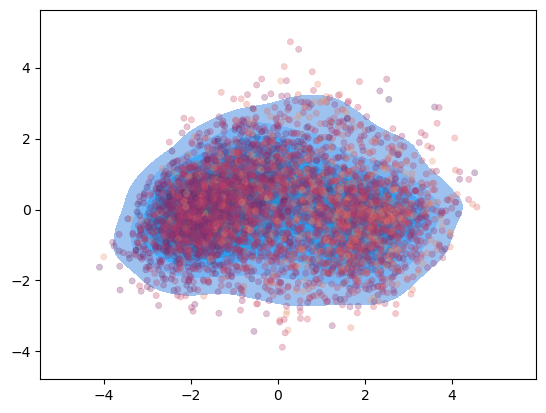

In [79]:
pca = decomposition.PCA()
preferences_pca = pca.fit_transform(subsets[[*personal_preference_columns, *acidity_columns, *bitterness_columns]])
cmap = sns.color_palette("flare", as_cmap=True)
sns.kdeplot(x=preferences_pca[:, 0], y=preferences_pca[:, 1], fill=True)
sns.scatterplot(x=preferences_pca[:, 0], y=preferences_pca[:, 1], alpha=.3, s=20, c=cmap(subsets[expertise_column] / 10.), edgecolor=None)

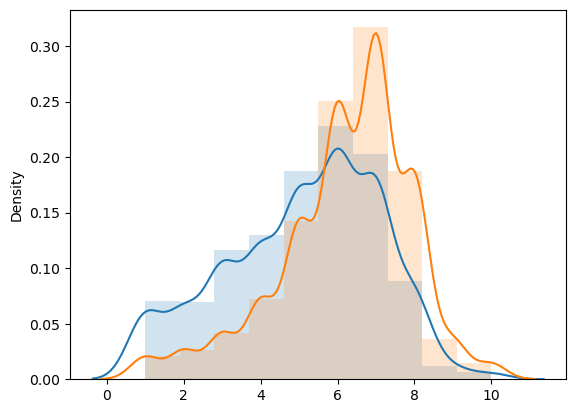

In [102]:
fig, ax = plt.subplots()
ax.hist(subsets.loc[preferences_pca[:, 0] > 0, expertise_column], alpha=0.2, density=True)
ax.hist(subsets.loc[preferences_pca[:, 0] < 0, expertise_column], alpha=0.2, density=True)
sns.kdeplot(x=subsets.loc[preferences_pca[:, 0] > 0, expertise_column[0]].to_numpy(), color="C0")
sns.kdeplot(x=subsets.loc[preferences_pca[:, 0] < 0, expertise_column[0]].to_numpy(), color="C1")

plt.show()

<Axes: >

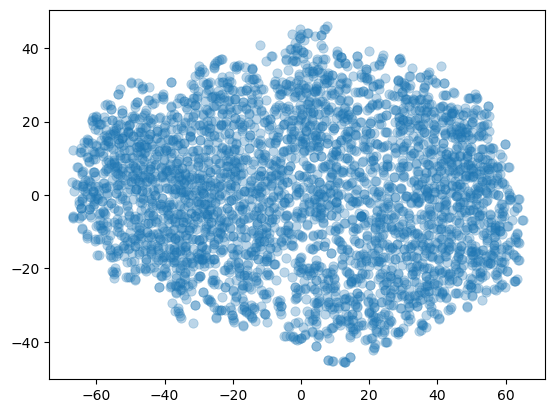

In [53]:
tsne = manifold.TSNE()
preferences_tsne = tsne.fit_transform(preferences)

# sns.kdeplot(x=preferences_tsne[:, 0], y=preferences_tsne[:, 1], fill=True)
sns.scatterplot(x=preferences_tsne[:, 0], y=preferences_tsne[:, 1], alpha=.3, s=45, edgecolor=None)

In [24]:
# data[["What is your age?", "How strong do you like your coffee?"]].groupby("What is your age?")
data["How strong do you like your coffee?"].value_counts()

data["Numeric Strength Preference"] = data["How strong do you like your coffee?"].apply(exploratory.coffee_strength_key.get)

<Axes: xlabel='What is your age?'>

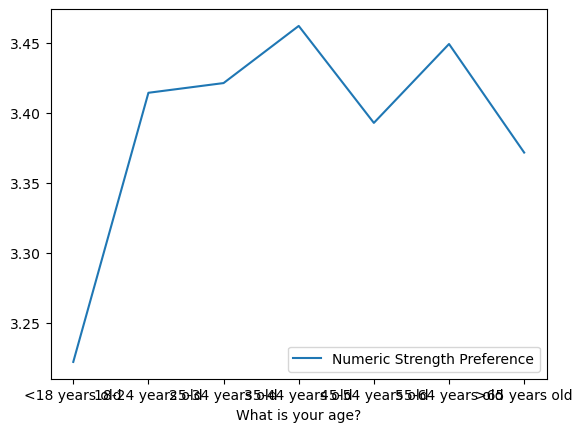

In [40]:
sns.lineplot(data[["What is your age?", "Numeric Strength Preference"]].groupby(["What is your age?"]).mean().loc[exploratory.age_ordering])

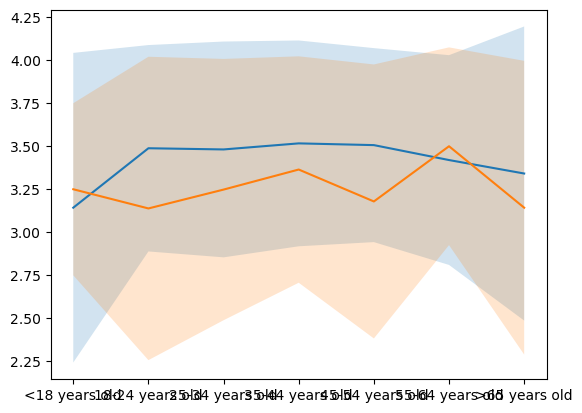

In [72]:
strength_pref_by_gender_age = data[["What is your age?", "Numeric Strength Preference", "Gender"]].groupby(["Gender", "What is your age?"]).mean()
strength_pref_by_gender_age_std = data[["What is your age?", "Numeric Strength Preference", "Gender"]].groupby(["Gender", "What is your age?"]).std()

def plot_with_stds(gender: str, ax):
  mean_line = strength_pref_by_gender_age.loc[gender].loc[exploratory.age_ordering, "Numeric Strength Preference"]
  std_line = strength_pref_by_gender_age_std.loc[gender].loc[exploratory.age_ordering, "Numeric Strength Preference"]
  ax.plot(mean_line)
  ax.fill_between(
    x = exploratory.age_ordering,
    y1 = (mean_line + std_line).to_numpy(),
    y2 = (mean_line - std_line).to_numpy(),
    alpha = 0.2
  )

fig, ax = plt.subplots()
plot_with_stds("Male", ax=ax)
plot_with_stds("Female", ax=ax)
# plt.plot(strength_pref_by_gender_age.loc["Female"].loc[exploratory.age_ordering])
# plt.plot(strength_pref_by_gender_age.loc["Non-binary"].loc[exploratory.age_ordering])
# plt.xticks(rotation=45, ha='right')

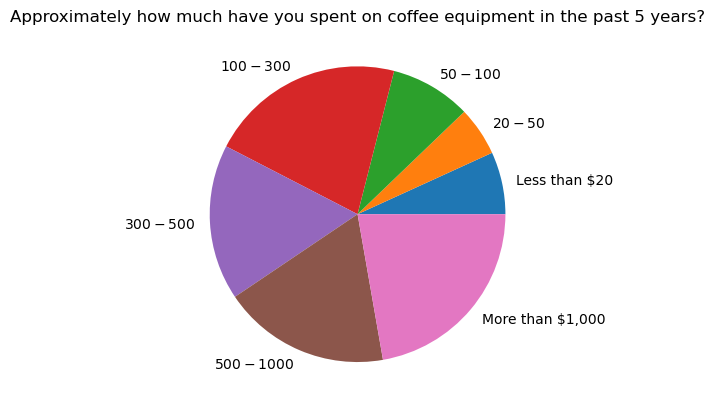

In [85]:
value_questions = [
"Do you feel like you’re getting good value for your money when you buy coffee at a cafe?",
"Approximately how much have you spent on coffee equipment in the past 5 years?",
"Do you feel like you’re getting good value for your money with regards to your coffee equipment?"]

to_plot = data[value_questions[1]].value_counts().loc[exploratory.coffee_spending_ordering]
fig, ax = plt.subplots()
ax.pie(x = to_plot, labels = to_plot.index)
ax.set(title = value_questions[1])
plt.show()

In [101]:
# to_plot = data[value_questions].groupby().loc[exploratory.coffee_spending_ordering]
# data[value_questions].groupby(value_questions[1]).apply(lambda s: ).loc[exploratory.coffee_spending_ordering]
data[value_questions].groupby(value_questions[1]).apply(lambda s : (s == "Yes").sum() / (s == "No").sum()).loc[exploratory.coffee_spending_ordering]

,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?
Approximately how much have you spent on coffee equipment in the past 5 years?,,,
Less than $20,1.205607,NaN,5.647059
$20-$50,1.619718,NaN,11.466667
$50-$100,1.495935,NaN,24.666667
$100-$300,1.402597,NaN,32.954545
$300-$500,1.678733,NaN,27.428571
$500-$1000,1.492188,NaN,16.805556
"More than $1,000",1.164804,NaN,21.257143
